# Re-estimation of a transition matrix

<img src="../tran.jpeg" alt="Drawing" style="width: 750px;"/>

In [19]:
import numpy as np
import scipy
import pyemma
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

## Generate discrete trajectory from transition matrix

In [20]:
import random
import numpy as np

size = 100000

T = np.matrix([[ 0.97, 0.03, 0],[0.015 , 0.97, 0.015],[ 0, 0.03, 0.97]])
P = T

def state0(i,num):
    if num>T[0,0]:
        return i+1
    return i

def state1(i,num):
    if num<T[1,0]:
        return i-1
    elif T[1,0]<num<(T[1,2]+T[1,0]):
        return i+1
    return i

def state2(i,num):
    if num>T[2,2]:
        return i-1
    return i

def decider(i, num):
    new_i = i
    if i==0:
        new_i = state0(i,num)
    if i==1:
        new_i = state1(i,num)
    if i==2:
        new_i = state2(i,num)

    return new_i


i=0 # initial condition
k=0

dtraj=[]
while k<size:
    num = random.uniform(0, 1)
    i = decider(i, num)
    dtraj.append(i)
    k=k+1


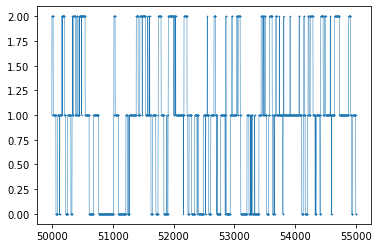

In [21]:
#indices=list(range(size))
start=int(size*0.5)
end=int(size*0.55)

indices=list(range(start, end))
dtrajslice=dtraj[start:end]

#print(len(indices))
#print(len(dtrajslice))

plt.scatter(indices, dtrajslice, s=.1)

plt.plot(indices, dtrajslice, linewidth=0.5)
plt.show();

In [22]:
def counter(traj):
    numberofelements = []
    k0 = 0
    k1 = 0
    k2 = 0
    results=[]
    for i in traj:
        if i==0:
            k0=k0+1
        elif i==1:
            k1=k1+1
        elif i==2:
            k2=k2+1
        else:
            print("Warning! Warning!")
    results.append(k0)
    results.append(k1)
    results.append(k2)
    return results

def runner():
    k=0
    i=0
    traj = []
    while k<size:
        num = random.uniform(0, 1)
        i = decider(i, num)
        traj.append(i)
        k=k+1
    return traj

runs=10

resultmatrix=zeros=np.zeros((runs,3))
for z in range(runs):
    resultmatrix[z]=counter(runner())

print(resultmatrix/size)
print("")
print("")
print("Ratios of time spent in state 0 to time spent in state 2")
for i in range(runs):
    print(resultmatrix[i][0]/resultmatrix[i][2])
print("")
print("")
print("Ratios of time spent in state 1 to time spent in state 2")

for i in range(runs):
    print(resultmatrix[i][1]/resultmatrix[i][2])

[[0.22875 0.51004 0.26121]
 [0.26083 0.50138 0.23779]
 [0.26516 0.50311 0.23173]
 [0.23784 0.51439 0.24777]
 [0.25087 0.48851 0.26062]
 [0.23739 0.50063 0.26198]
 [0.24117 0.5004  0.25843]
 [0.26096 0.48741 0.25163]
 [0.24747 0.5173  0.23523]
 [0.25733 0.51262 0.23005]]


Ratios of time spent in state 0 to time spent in state 2
0.875732169518778
1.0968922158206822
1.1442627195442971
0.9599225087783024
0.962589210344563
0.9061378731200855
0.933212088379832
1.0370782498112308
1.052034179313863
1.1185829167572268


Ratios of time spent in state 1 to time spent in state 2
1.952605183568776
2.108499095840868
2.171104302420921
2.076078621302014
1.8744148568797483
1.9109474005649285
1.936307704213907
1.937010690299249
2.199124261361221
2.228298196044338


## Generate continuous trajectory from discrete trajectory

In [23]:
# parameters

mu_0 = [-5,5]
mu_1 = [0,0]
mu_2 = [-5,-5]

sigma_0 = [[1,0],[0,1]]
sigma_1 = [[1,0],[0,1]]
sigma_2 = [[1,0],[0,1]]

mus = [mu_0, mu_1, mu_2]
sigmas = [sigma_0, sigma_1, sigma_2]

# generates a continuous trajectory drawn from bivariate gaussians
def generate_traj(dtraj, mus, sigmas):
    traj = []
    for i in range(len(dtraj)):
        if dtraj[i] == 0:
            traj.append(np.random.multivariate_normal(mus[0], sigmas[0], size=1)[0])
        elif dtraj[i] == 1:
            traj.append(np.random.multivariate_normal(mus[1], sigmas[1], size=1)[0])
        elif dtraj[i] == 2:
            traj.append(np.random.multivariate_normal(mus[2], sigmas[2], size=1)[0])
        else:
            print("something went wrong")
            exit()
    return np.array(traj)

traj = generate_traj(dtraj, mus, sigmas)

#print(traj)

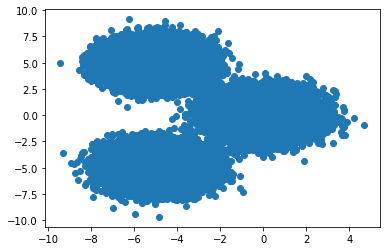

In [24]:
plt.scatter(traj[:,0], traj[:,1]);

## Rotate trajectory into 5 dimensions and add noise

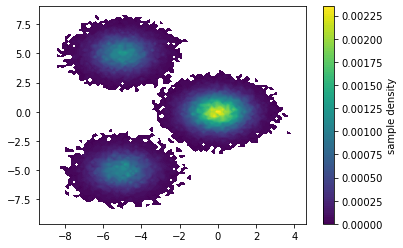

In [25]:
pyemma.plots.plot_density(traj[:,0], traj[:,1]);

In [26]:
def random_matrix():
    v=np.array([np.random.random() for n in range(5)])
    w=np.array([np.random.random() for n in range(5)])
    #generating two random 5d vectors
    vn=v/np.sqrt(sum(v**2))
    wn=(w-np.dot(w,vn)*vn)/np.sqrt(sum((w-np.dot(w,vn)*vn)**2))
    #orthonormalization with Gram-Schmidt
    
    return np.array([vn,wn])

def fived(x,y, random_matrix,noise):
    noise_matrix=[[np.random.random() - 0.5 for n in range(5)],[np.random.normal() for n in range(5)],[np.random.poisson() for n in range(5)]]
    out=np.matmul(np.array([x,y]), random_matrix) + np.array(noise_matrix[noise])
    return out

random_matrix = random_matrix()

In [27]:
traj_5dim = []

for i in range(len(traj)):
    traj_5dim.append(fived(traj[i,0],traj[i,1], random_matrix, 0))

traj_5dim = np.array(traj_5dim)

## Analyse generated trajectory with pyEMMA

In [28]:
#specify data
data = traj_5dim

tica = pyemma.coordinates.tica(data, lag=10, var_cutoff=0.95)
tica_concatenated = np.concatenate(tica.get_output())

cls_tica = pyemma.coordinates.cluster_kmeans(tica, k=20, max_iter=50, stride=10)
its_tica = pyemma.msm.its(cls_tica.dtrajs, lags=[1, 2, 5, 10, 20], nits=6, errors='bayes')

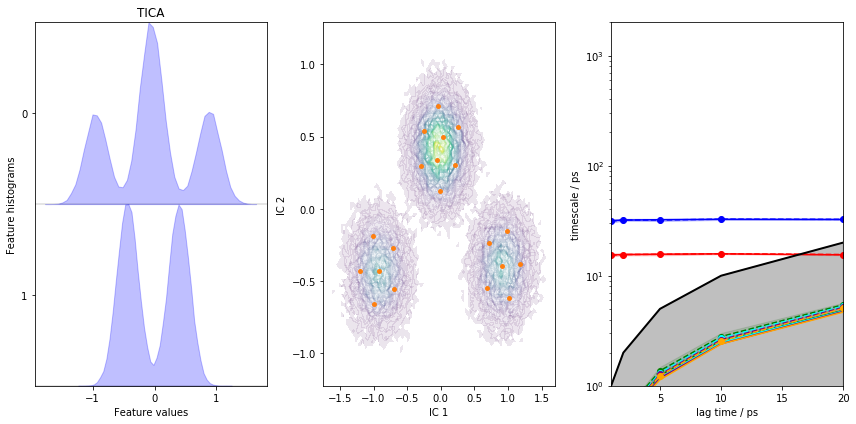

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
pyemma.plots.plot_feature_histograms(tica_concatenated, ax=axes[0])
axes[0].set_title('TICA')
pyemma.plots.plot_density(*tica_concatenated.T, ax=axes[1], cbar=False, alpha=0.1)

axes[1].scatter(*cls_tica.clustercenters.T, s=15, c='C1')
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
pyemma.plots.plot_implied_timescales(its_tica, ax=axes[2], units='ps')
axes[2].set_ylim(1, 2000)
axes[2].set_ylim(1, 2000)
fig.tight_layout()

In [30]:
#specify data
data = traj_5dim

tica = pyemma.coordinates.tica(data, lag=10, var_cutoff=0.95)
tica_concatenated = np.concatenate(tica.get_output())

cls_tica = pyemma.coordinates.cluster_kmeans(tica, k=3, max_iter=50, stride=10)
its_tica = pyemma.msm.its(cls_tica.dtrajs, lags=[1, 2, 5, 10, 20], nits=2, errors='bayes')

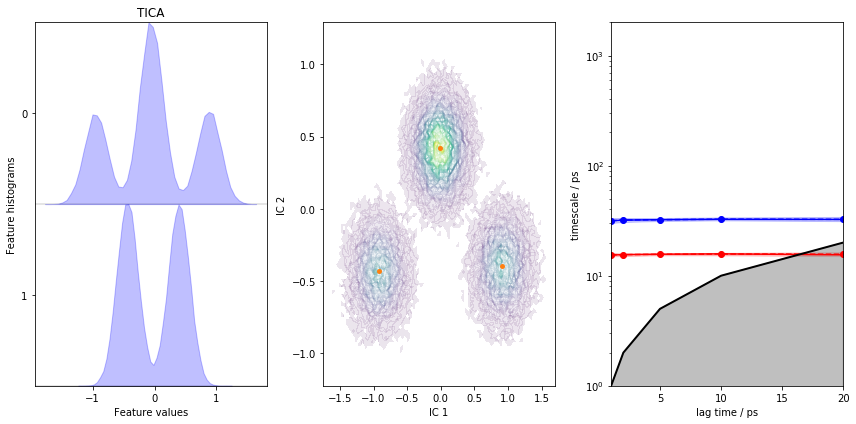

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
pyemma.plots.plot_feature_histograms(tica_concatenated, ax=axes[0])
axes[0].set_title('TICA')
pyemma.plots.plot_density(*tica_concatenated.T, ax=axes[1], cbar=False, alpha=0.1)

axes[1].scatter(*cls_tica.clustercenters.T, s=15, c='C1')
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
pyemma.plots.plot_implied_timescales(its_tica, ax=axes[2], units='ps')
axes[2].set_ylim(1, 2000)
axes[2].set_ylim(1, 2000)
fig.tight_layout()

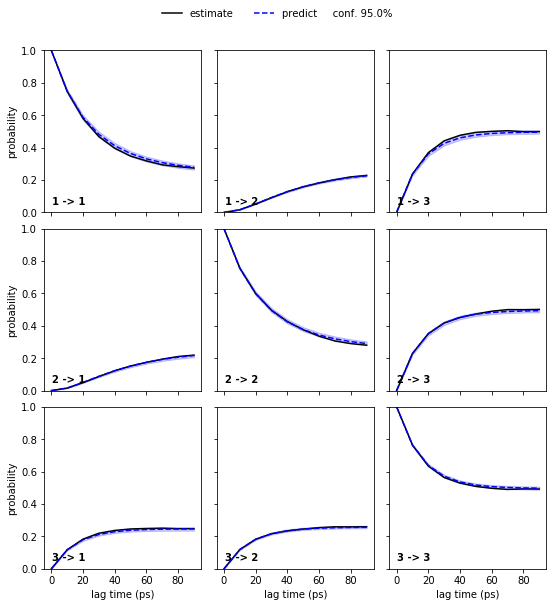

In [32]:
# generate msm
bayesian_msm = pyemma.msm.bayesian_markov_model(cls_tica.dtrajs, lag=10, dt_traj='1 ps')
# plot ck test
pyemma.plots.plot_cktest(bayesian_msm.cktest(3), units='ps');

In [33]:
# transition matrix
T = scipy.linalg.fractional_matrix_power(bayesian_msm.transition_matrix, 1/10)
print(bayesian_msm.transition_matrix)
print()
print(T)
print()
print(P)

[[0.74738 0.23629 0.01632]
 [0.11751 0.76363 0.11886]
 [0.01563 0.22888 0.75549]]

[[ 0.9691   0.03098 -0.00008]
 [ 0.01541  0.96909  0.0155 ]
 [-0.00008  0.02986  0.97022]]

[[0.97  0.03  0.   ]
 [0.015 0.97  0.015]
 [0.    0.03  0.97 ]]


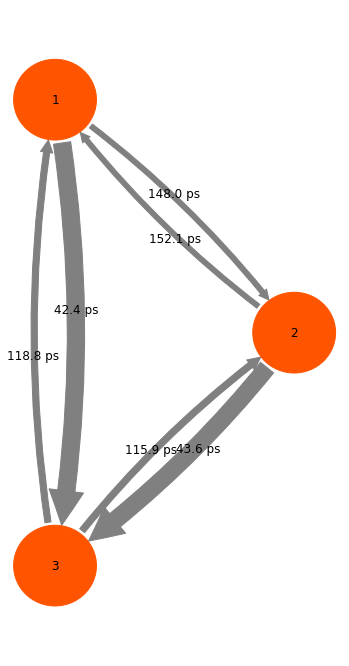

In [34]:
nstates = 3

mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = bayesian_msm.mfpt(bayesian_msm.metastable_sets[i], bayesian_msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=np.asarray([[-1.5, 1.5], [0, 0], [-1.5, -1.5]]),
    arrow_label_format='%.1f ps',
    arrow_labels=mfpt,
    arrow_scale=3.0,
    state_labels=range(1, nstates + 1),
    size=12);